#### importing required libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### loading data

In [48]:
df1 = pd.read_csv(r'E:\adult.data', names= ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])

In [49]:
df1.shape

(32561, 15)

In [50]:
df2 = pd.read_csv(r'E:\adult.test',header=1, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race','sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income'])

#### concating both data

In [51]:
df = pd.concat([df1, df2],axis=0)

In [52]:
df.shape

(48841, 15)

In [53]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data cleaning

making copy of data

In [54]:
df_copy = df

In [55]:
df_copy.replace(' ?', np.nan, inplace=True)

In [62]:
df_copy.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

#### replacing null values with mode

#### define numerical & categorical columns

In [63]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O' ]

## print columns

print(" We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features), categorical_features))

 We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [64]:
#### removing spaces from dataset

for feature in categorical_features:
    df_copy[feature] = df_copy[feature].str.strip()

In [65]:
df_copy['income'] = df_copy['income'].replace('<=50K.','<=50K' )
df_copy['income'] = df_copy['income'].replace('>50K.', '>50K')

#### filling null values with mode

In [69]:
columns_with_nan = ['workclass', 'occupation', 'native-country' ]

for column in  columns_with_nan:
    df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
#     df_copy[column].fillna(data_copy[column].mode()[0], inplace = True)

In [70]:
df_copy.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

#### checking duplicate values

In [71]:
df_copy.duplicated().sum()

53

#### removing duplicate values 

In [73]:
df_copy = df_copy.drop_duplicates()

In [74]:
df_copy.shape

(48788, 15)

#### checking unique values

In [76]:
df_copy.nunique()

age                  74
workclass             8
fnlwgt            28522
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       41
income                2
dtype: int64

In [77]:
df_copy.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48788.000000,4.878800e+04,48788.000000,48788.000000,48788.000000,48788.000000
mean,38.653419,1.896689e+05,10.078872,1080.261970,87.599164,40.425904
std,13.708427,1.056192e+05,2.570061,7456.055537,403.217003,12.392983
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376110e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


 ### Data Visualization 

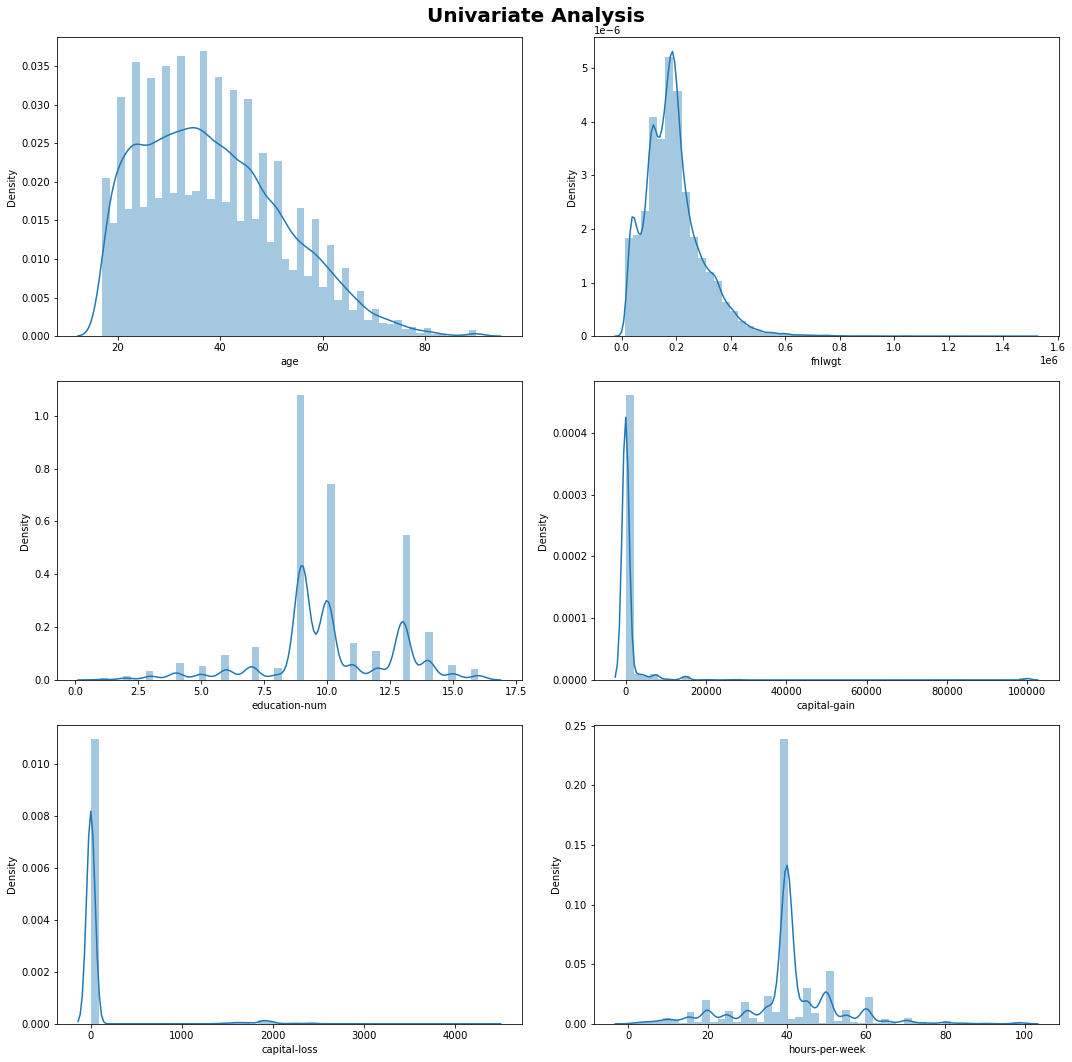

In [79]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis", fontsize = 20, fontweight = 'bold')

for i in range(0, len(numeric_features)):
    plt.subplot(3,2,i+1)
    sns.distplot(x=df_copy[numeric_features[i]], kde=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### bivariate analysis

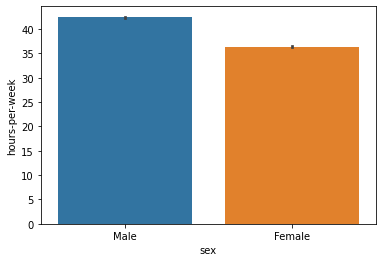

In [80]:
sns.barplot(x='sex', y='hours-per-week', data=df_copy);

#### observation

- Males are working more as compared to females

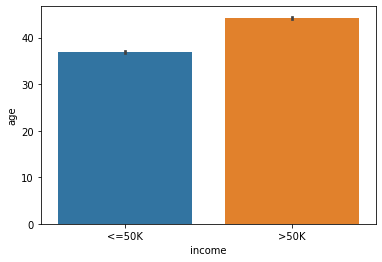

In [81]:
sns.barplot(x='income', y='age', data=df_copy);

#### observation

- As the age increses income also increases

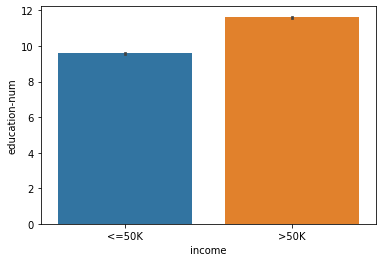

In [82]:
sns.barplot(x='income', y='education-num', data=df_copy);

#### observation

 - As education num increases income also increases

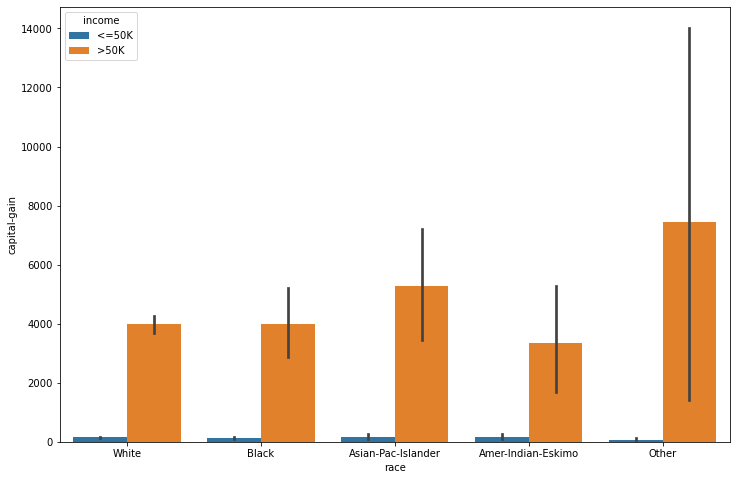

In [83]:
plt.figure(figsize=(12,8))

sns.barplot(x='race', y='capital-gain', data=df_copy, hue='income');

#### observation

 - Asian-Pac-Islander have gain more capital followed by Black, white and than India

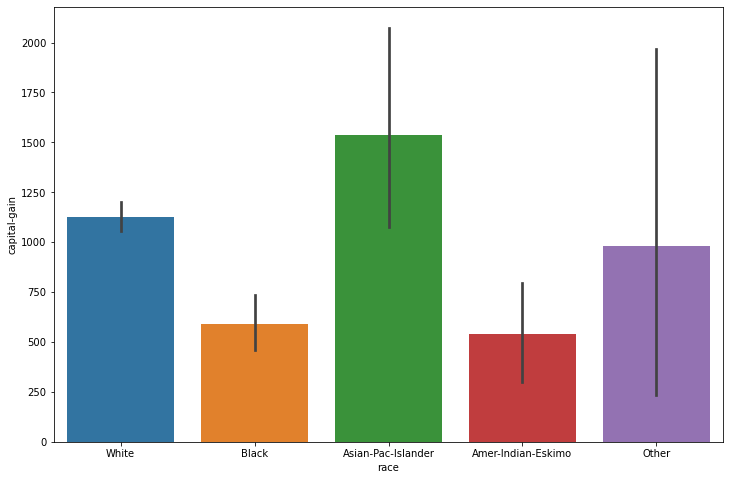

In [84]:
plt.figure(figsize=(12,8))

sns.barplot(x='race', y='capital-gain', data=df_copy);

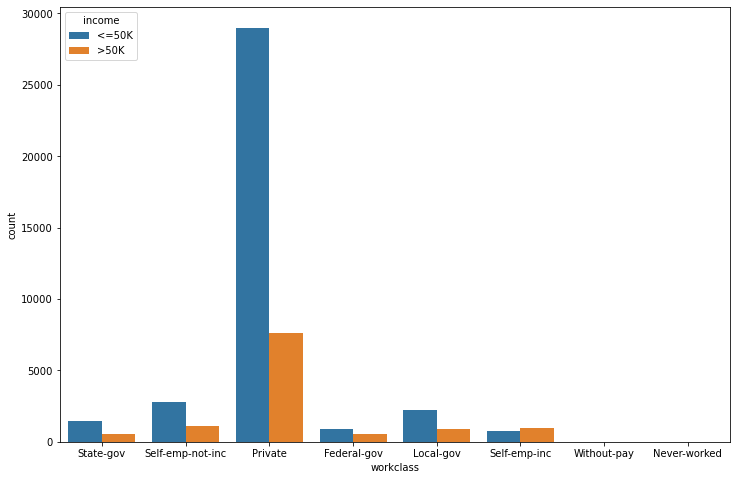

In [85]:
plt.figure(figsize=(12,8))

sns.countplot(data=df_copy, x='workclass', hue='income');

#### observation

- There are more Private employees getting income more than 50k followed by self employed

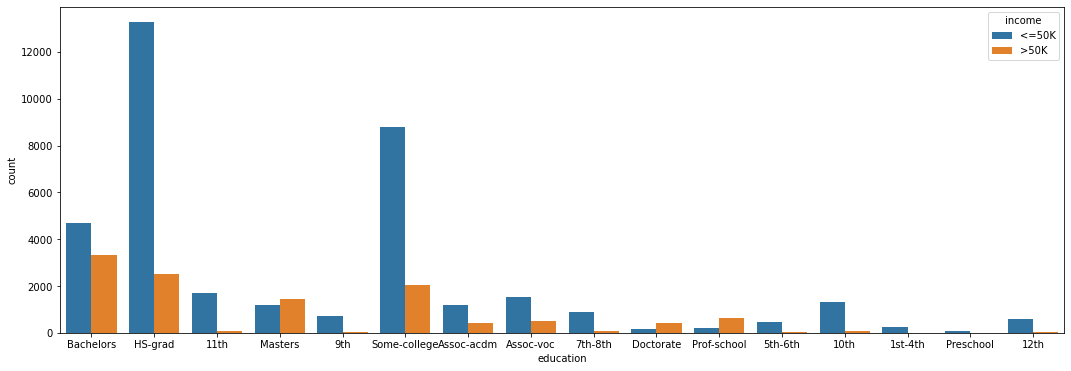

In [86]:
plt.figure(figsize=(18,6))

sns.countplot(data=df_copy, x='education', hue='income');

#### observation

- More number of Bachelors degree holders have income above 50k
- Maximum number of HS - grad have income less than 50 k

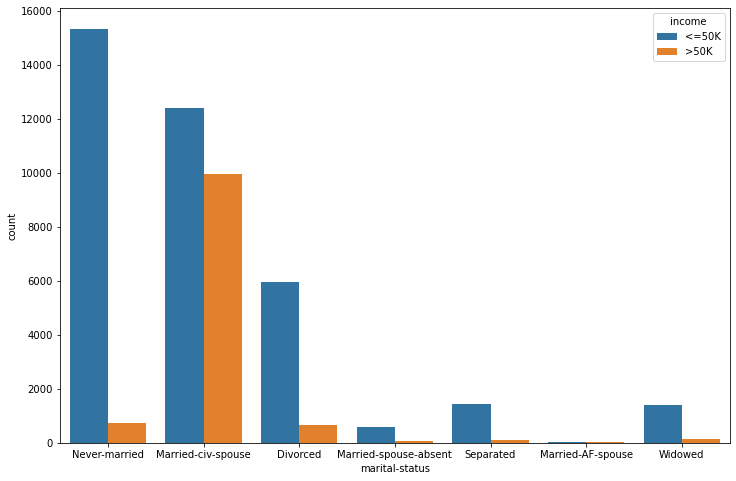

In [87]:
plt.figure(figsize=(12,8))

sns.countplot(data=df_copy, x='marital-status', hue='income');

#### observation

- More number of Married person have income above 50k than others
- Maximum Never maried person have income less than 50 k

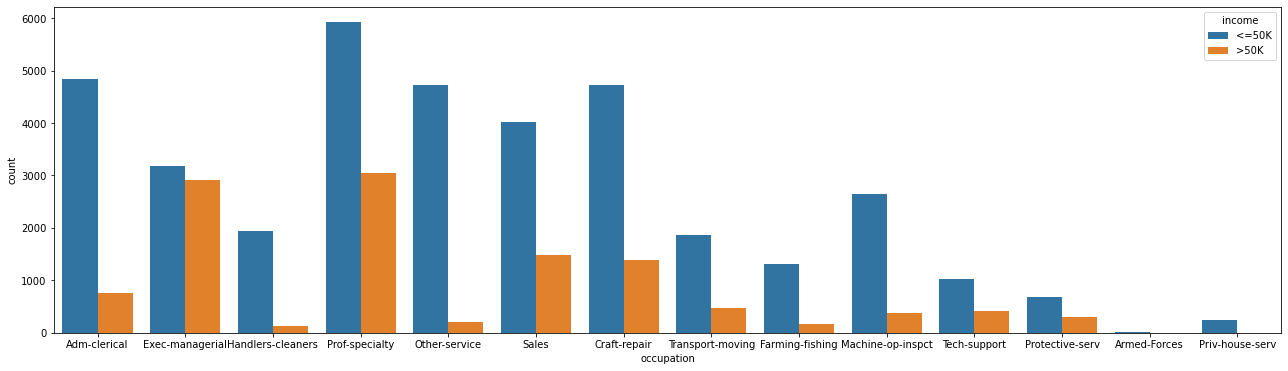

In [88]:
plt.figure(figsize=(22,6))

sns.countplot(data=df_copy, x='occupation', hue='income');

#### observation

-  More number of Executive or managerial people are getting salary above than 50 K
- Maximum number of clerical and craft repair people are getting less than 50k

#### multivariate analysis

<AxesSubplot:>

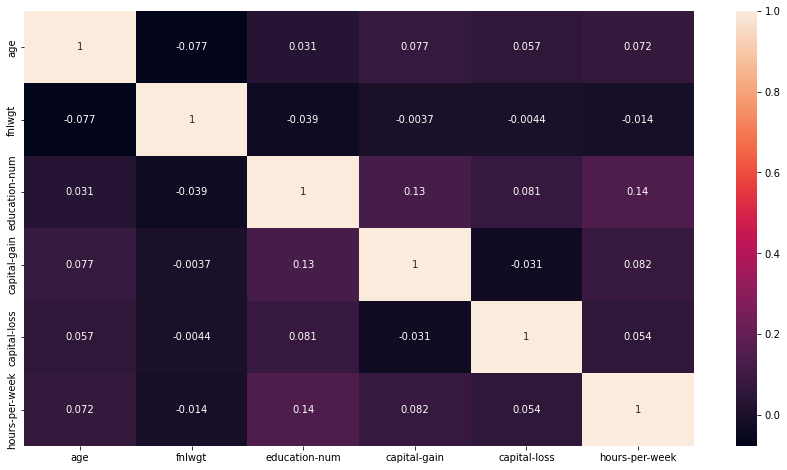

In [91]:
plt.figure(figsize=(15,8))
sns.heatmap(df[numeric_features].corr(), annot=True)

#### checking for multicollinearity

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(df_copy[numeric_features].values, i) for i in range(len(df_copy[numeric_features].columns))]
vif_data['features'] = df_copy[numeric_features].columns
vif_data

,VIF,features
0,7.197304,age
1,3.690498,fnlwgt
2,10.886104,education-num
3,1.033222,capital-gain
4,1.056885,capital-loss
5,9.707579,hours-per-week


#### observation

As education num  has VIF greater than 10 so we have to drop it

In [94]:
## dropping education - num column

df_copy.drop(['education-num'], axis=1, inplace=True)

In [95]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [103]:
from sklearn.preprocessing import LabelEncoder
for column in df_copy.columns:
    if df_copy[column].dtypes == 'object':
        encoder = LabelEncoder()
        df_copy[column] = encoder.fit_transform(df_copy[column])
          
        
          
  
    

#### splitting dependent and independent variable

In [104]:
X = df_copy.drop('income', axis=1)
y = df_copy['income']

In [105]:
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,2,9,5,2,0,0,0,40,4


In [107]:
df_copy_m = df_copy

In [109]:
### train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [110]:
X_train

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
712,36,3,271767,9,5,9,1,4,1,0,0,40,38
9788,36,5,285020,11,2,2,0,4,1,2885,0,40,38
20415,41,3,190591,7,0,3,1,2,0,0,0,40,22
19813,35,3,183800,9,2,0,0,4,1,0,0,40,38
1395,24,3,103277,8,4,9,3,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11287,24,6,247075,11,4,0,4,2,0,0,0,20,38
12214,42,3,188243,9,0,3,1,4,0,0,0,50,38
5628,59,3,64102,0,2,5,0,4,1,0,0,40,38
860,18,3,216284,1,4,0,3,4,0,0,0,20,38


### Logistic model building

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [112]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred_logreg = log_reg.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred_logreg)

0.7851335656213705

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     11066
           1       0.64      0.27      0.38      3571

    accuracy                           0.79     14637
   macro avg       0.72      0.61      0.63     14637
weighted avg       0.76      0.79      0.75     14637



### Decision Tree Classifier

In [116]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
y_pred_dt = dt.predict(X_test)

In [118]:
accuracy_score(y_test, y_pred_dt)

0.8021452483432397

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     11066
           1       0.59      0.62      0.60      3571

    accuracy                           0.80     14637
   macro avg       0.73      0.74      0.74     14637
weighted avg       0.81      0.80      0.80     14637



### SVC

In [120]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import make_pipeline
clf = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')

In [121]:
clf = clf.fit(X_train,y_train)

In [122]:
y_pred_svc = clf.predict(X_test)

In [ ]:
#Finding best parameters for our SVC model
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# param = { 'C': [1],  
#    'gamma': [1], 
#    'kernel': ['rbf','linear','sigmoid']  }
# grid = GridSearchCV(SVC(), param, refit = True,cv=3, verbose = 3,n_jobs=-1)

In [ ]:
# grid.fit(X_train, y_train)

In [123]:
accuracy_score(y_test, y_pred_svc)

0.7558242809318849

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11066
           1       0.00      0.00      0.00      3571

    accuracy                           0.76     14637
   macro avg       0.38      0.50      0.43     14637
weighted avg       0.57      0.76      0.65     14637



In [125]:
#### standardizing data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [127]:
y_pred_logreg_scaled = log_reg_scaled.predict(X_test_scaled)

In [128]:
accuracy_score(y_test, y_pred_logreg_scaled)

0.7975678076108492

In [129]:
print('=========Classification Report of Logistic Regression with Scaled Data==========')
print(classification_report(y_test, y_pred_logreg_scaled))

=========Classification Report of Logistic Regression with Scaled Data==========
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     11066
           1       0.70      0.30      0.42      3571

    accuracy                           0.80     14637
   macro avg       0.75      0.63      0.65     14637
weighted avg       0.78      0.80      0.77     14637



In [130]:
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [131]:
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)
accuracy_score(y_test, y_pred_dt_scaled)

0.8013937282229965

In [132]:
from sklearn.metrics import classification_report
print('=========Classification Report of Decision Tree Classifier with Scaled Data==========')
print(classification_report(y_test, y_pred_dt_scaled))

=========Classification Report of Decision Tree Classifier with Scaled Data==========
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11066
           1       0.59      0.61      0.60      3571

    accuracy                           0.80     14637
   macro avg       0.73      0.74      0.73     14637
weighted avg       0.80      0.80      0.80     14637



In [133]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC,SVC
from sklearn.pipeline import make_pipeline
clf_scaled = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf',probability=True)

In [134]:
clf_scaled = clf_scaled.fit(X_train_scaled,y_train)

In [135]:
y_pred_svc_scaled = clf_scaled.predict(X_test_scaled)

In [136]:
accuracy_score(y_test, y_pred_svc_scaled)

0.8201134112181458

In [137]:
print('=========Classification Report of Support Vector Classifier with Scaled Data==========')
print(classification_report(y_test, y_pred_svc_scaled))

=========Classification Report of Support Vector Classifier with Scaled Data==========
              precision    recall  f1-score   support

           0       0.84      0.93      0.89     11066
           1       0.69      0.47      0.56      3571

    accuracy                           0.82     14637
   macro avg       0.77      0.70      0.72     14637
weighted avg       0.81      0.82      0.81     14637



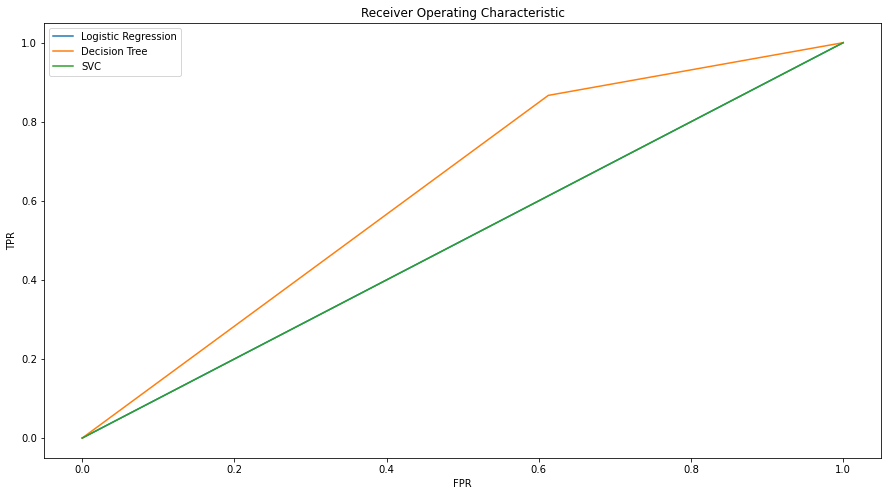

In [139]:
plt.figure(figsize=(15,8))

#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = log_reg_scaled.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = dt_scaled.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = clf_scaled.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)


# plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree")
plt.plot(fpr3, tpr3, label= "SVC")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [140]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred_prob1)
auc_score2 = roc_auc_score(y_test, y_pred_prob2)
auc_score3 = roc_auc_score(y_test, y_pred_prob3)

print(auc_score1,auc_score2,auc_score3)

0.5 0.6270986134819099 0.5
